<a href="https://colab.research.google.com/github/Juan-Draghi/relevamiento-boletin-oficial-argentina/blob/main/Busqueda_Boletin_Oficial_RA_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

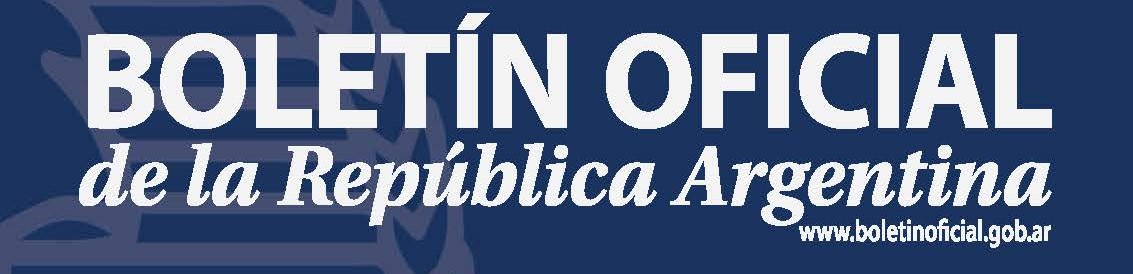

# 📄 Búsqueda de Términos Clave en el Boletín Oficial
Este notebook permite analizar un archivo PDF del Boletín Oficial de la República Argentina, buscando un conjunto de términos clave relacionados con el ejercicio profesional de la arquitectura y el urbanismo.


In [ ]:
# 📦 Instalación de dependencias
!pip install pdfplumber openpyxl
!pip install tqdm

import logging
logging.getLogger("pdfminer").setLevel(logging.ERROR)

In [ ]:
# 📁 Subida del archivo PDF
from google.colab import files
uploaded = files.upload()

In [ ]:
keywords = [
    "títulos de grado",
    "construcción",
    "arquitectura",
    "arquitectos",
    "arquitecto",
    "ejercicio profesional",
    "ejercicio de profesiones universitarias",
    "profesionales universitarios",
    "entidades profesionales",
    "matriculación",
    "honorarios profesionales",
    "arancel de honorarios",
    "Decreto Nº 911/1996",
    "Decreto 911/1996",
    "Decreto Nº 911",
    "Programa Nacional de Etiquetado de Viviendas",
    "PRONEV",
    "instalaciones sanitarias",
    "instalaciones de gas",
    "actividades profesionales reservadas exclusivamente al título",
    "actividades profesionales reservadas al título",
    "Resolución 1254/2018",
    "Resolución Nº 1254/2018",
    "Resolución Nº 498",
    "Resolución Nº 498/2006",
    "actividades profesionales reservadas al título de arquitecto",
    "Decreto 2293/92",
    "Decreto Nº 2293/92",
    "Decreto N° 2284/91",
    "Decreto 2284/91",
    "Decreto-Ley Nº 6.070/1958",
    "Decreto-Ley 6.070/58",
    "6.070/58",
    "6070/58",
    "Decreto 1099/1984",
    "Decreto Nº 1099/1984",
    "Decreto Nº 1099/84",
    "Decreto 1099/84",
    "Decreto-Ley N° 7887",
    "Decreto-Ley N° 7887/55",
    "Decreto-Ley 7887/55"
]

In [ ]:
# 🔍 Búsqueda de términos clave y exportación a Excel

import pdfplumber
import re
import pandas as pd
import io
from tqdm.notebook import tqdm

resultados = []

# Detectar el archivo PDF
pdf_file = next((f for f in uploaded if f.endswith('.pdf')), None)

with pdfplumber.open(io.BytesIO(uploaded[pdf_file])) as pdf:
    for i, page in enumerate(tqdm(pdf.pages, desc="Procesando páginas")):
        text = page.extract_text()
        if text:
            for term in keywords:
                matches = list(re.finditer(re.escape(term), text, re.IGNORECASE))
                for m in matches:
                    start = max(m.start() - 150, 0)
                    end = m.end() + 150
                    context = text[start:end].replace('\n', ' ')
                    resultados.append({
                        "Página": i + 1,
                        "Término": term,
                        "Contexto": context
                    })

# Exportar a archivo Excel
df_resultados = pd.DataFrame(resultados)
nombre_salida = "resultados_busqueda_BORA.xlsx"
df_resultados.to_excel(nombre_salida, index=False)

# Descargar archivo
from google.colab import files
files.download(nombre_salida)
